In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
#ignorar os avisos do python
warnings.filterwarnings('ignore')

# alterando o tamanho das figuras
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (16,9)

In [2]:
url = "https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip"
df = pd.read_csv(url, compression='zip', sep = ';')
df['datahora'] = pd.to_datetime(df['datahora'], format = "%Y-%m-%d")
df_sp = df.query("nome_munic == 'São Paulo'")

In [3]:
prophet = pd.DataFrame()
prophet['ds'] = df_sp['datahora']
prophet['y'] = df_sp['casos_novos']

In [4]:
#import Prophet
from fbprophet import Prophet

In [5]:
modelo = Prophet()

In [6]:
modelo.fit(prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
futuro = modelo.make_future_dataframe(periods=30)

In [8]:
previsao = modelo.predict(futuro)

In [9]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-119.052217,-778.804628,1628.653743,-119.052217,-119.052217,500.712817,500.712817,500.712817,500.712817,500.712817,500.712817,0.0,0.0,0.0,381.660600
1,2020-02-26,-101.733359,-728.125925,1726.680420,-101.733359,-101.733359,555.369016,555.369016,555.369016,555.369016,555.369016,555.369016,0.0,0.0,0.0,453.635657
2,2020-02-27,-84.414501,-595.994619,1654.640118,-84.414501,-84.414501,650.415890,650.415890,650.415890,650.415890,650.415890,650.415890,0.0,0.0,0.0,566.001389
3,2020-02-28,-67.095643,-868.040260,1622.643496,-67.095643,-67.095643,368.220574,368.220574,368.220574,368.220574,368.220574,368.220574,0.0,0.0,0.0,301.124931
4,2020-02-29,-49.776785,-1207.235759,1212.608499,-49.776785,-49.776785,30.668336,30.668336,30.668336,30.668336,30.668336,30.668336,0.0,0.0,0.0,-19.108449


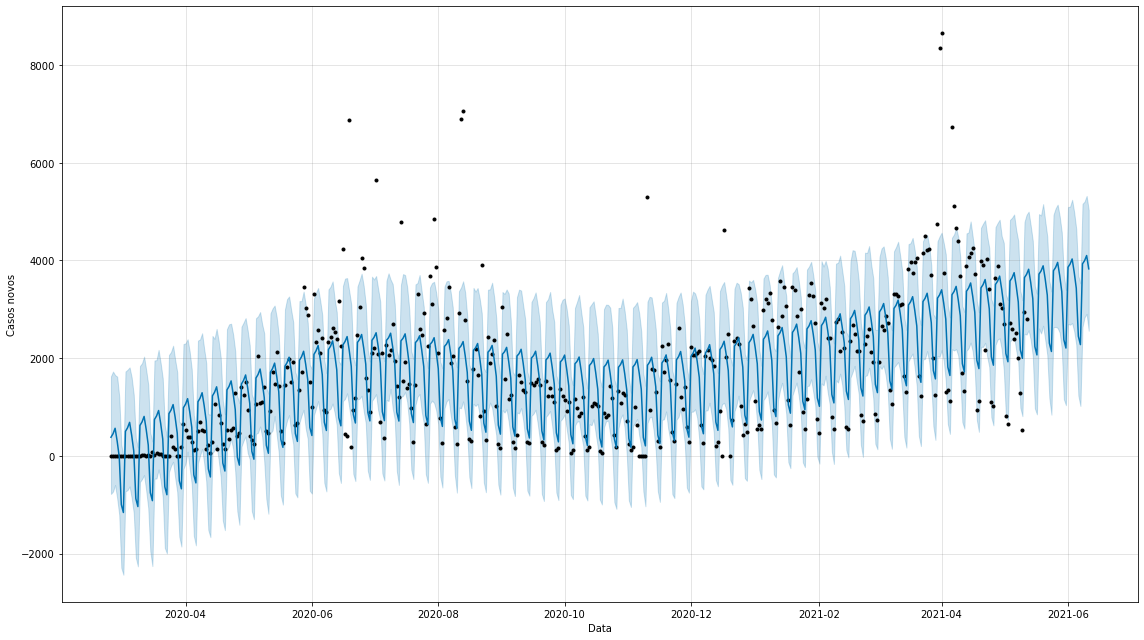

In [10]:
modelo.plot(previsao,xlabel = 'Data', ylabel = 'Casos novos', figsize=(16,9));

# Separação em dados de treino e dados de teste

In [11]:
df_sp.shape

(443, 26)

Serão utilizado os 400 primeiros dados para treinar o modelo e os ultimos dados para testá-lo

In [12]:
profeta = pd.DataFrame()
profeta['ds'] = df_sp['datahora'][:400]
profeta['y'] = df_sp['casos_novos'][:400]

In [13]:
modelo = Prophet()
modelo.fit(profeta)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
previsto = modelo.make_future_dataframe(periods=43)
previsto = modelo.predict(previsto)
previsto.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-149.825882,-807.857979,1453.702948,-149.825882,-149.825882,457.898870,457.898870,457.898870,457.898870,457.898870,457.898870,0.0,0.0,0.0,308.072988
1,2020-02-26,-131.885705,-766.374835,1390.748280,-131.885705,-131.885705,456.975129,456.975129,456.975129,456.975129,456.975129,456.975129,0.0,0.0,0.0,325.089424
2,2020-02-27,-113.945527,-616.708082,1605.023479,-113.945527,-113.945527,596.202571,596.202571,596.202571,596.202571,596.202571,596.202571,0.0,0.0,0.0,482.257043
3,2020-02-28,-96.005350,-759.509150,1288.767083,-96.005350,-96.005350,340.836568,340.836568,340.836568,340.836568,340.836568,340.836568,0.0,0.0,0.0,244.831218
4,2020-02-29,-78.065173,-1094.753789,1019.040822,-78.065173,-78.065173,59.096534,59.096534,59.096534,59.096534,59.096534,59.096534,0.0,0.0,0.0,-18.968639


In [15]:
df_teste = pd.DataFrame()
df_teste['ds'] = df_sp['datahora'][400:]
df_teste['y'] = df_sp['casos_novos'][400:]

In [35]:
df_teste.shape

(43, 2)

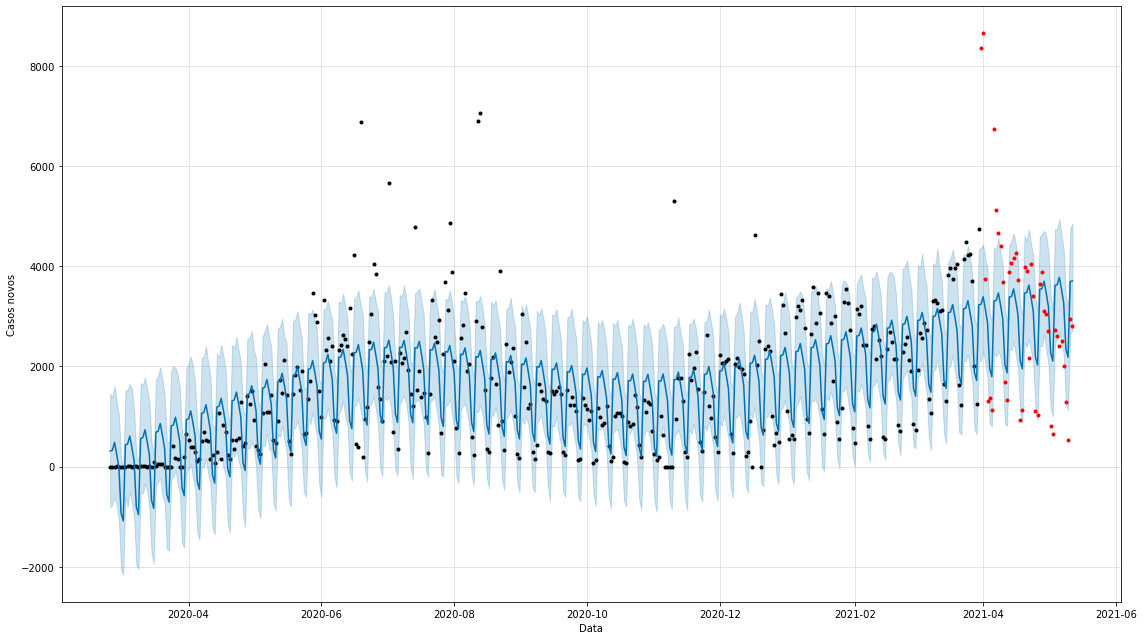

In [16]:
modelo.plot(previsto,xlabel = 'Data', ylabel = 'Casos novos', figsize=(16,9));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

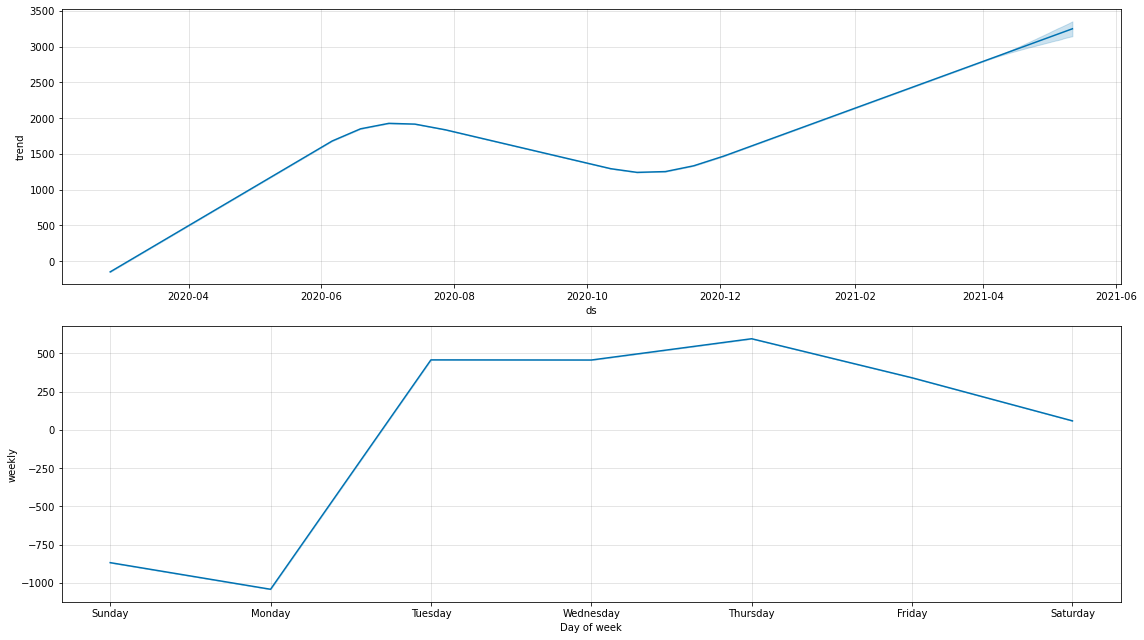

In [17]:
modelo.plot_components(previsto,figsize=(16,9));

In [18]:
from fbprophet.plot import add_changepoints_to_plot

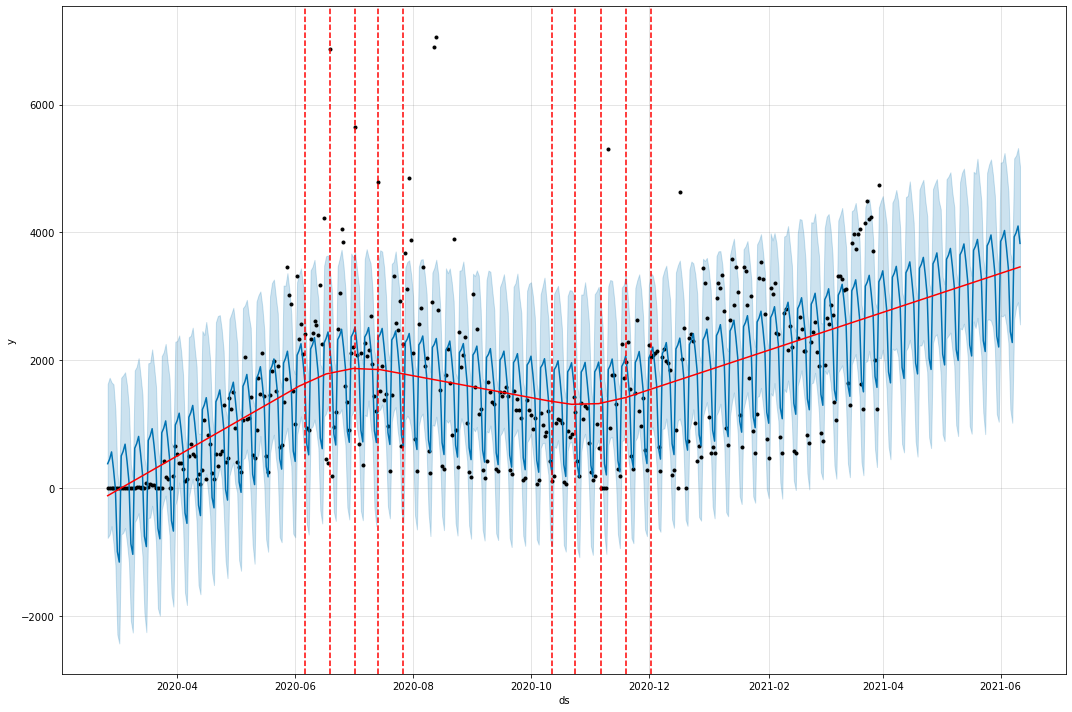

In [19]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

In [28]:
def modelo_profeta(data, periodo_previsao, change_points, scale):

    # Preparando os dados
    profeta = pd.DataFrame()
    profeta['ds'] = df_sp['datahora'][:data.shape[0]-periodo_previsao]
    profeta['y'] = df_sp['casos_novos'][:data.shape[0]-periodo_previsao]

    df_teste = pd.DataFrame()
    df_teste['ds'] = df_sp['datahora'][data.shape[0]-periodo_previsao:]
    df_teste['y'] = df_sp['casos_novos'][data.shape[0]-periodo_previsao:]    
    
    
    # Criando e treinando o modelo
    modelo = Prophet(n_changepoints=change_points, changepoint_prior_scale = scale)
    # Levando em consideração os feriados do país
    modelo.add_country_holidays(country_name='BR')

    modelo.fit(profeta)

    # Fazendo as previsões
    previsto = modelo.make_future_dataframe(periods=periodo_previsao)
    previsto = modelo.predict(previsto)

    return modelo, previsto


In [26]:
modelo, previsao = modelo_profeta(df,43,50,10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


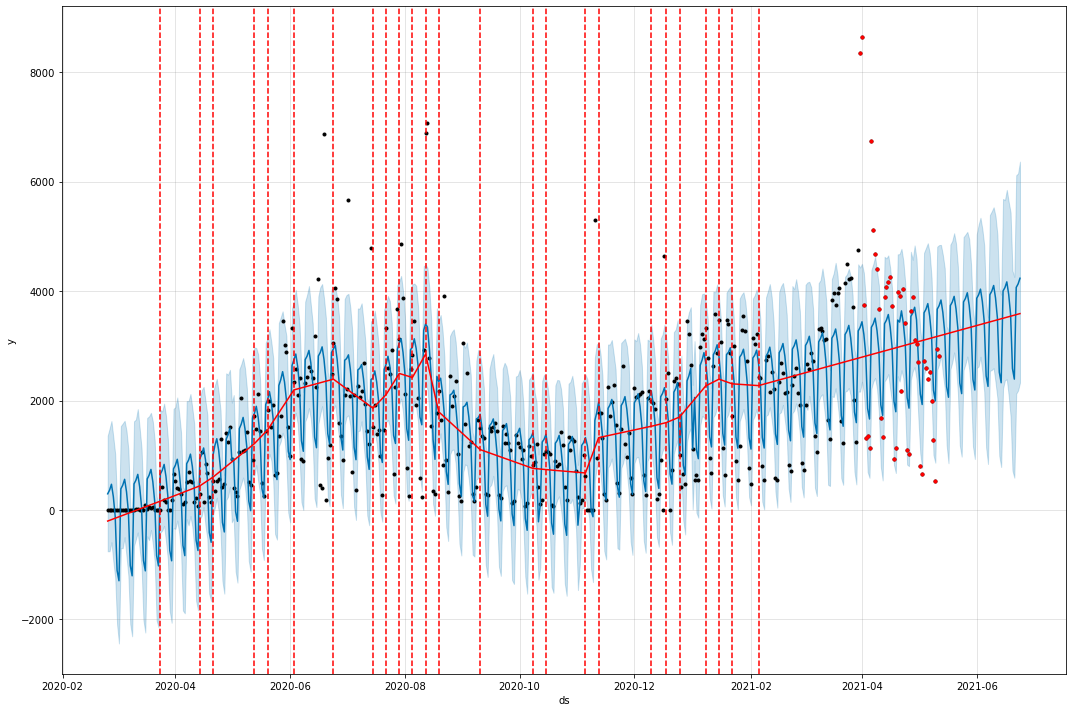

In [27]:
# Plot
fig = modelo.plot(previsao, figsize=(15,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)


In [29]:
feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]


In [30]:
feriados_sp_2020 = pd.DataFrame({
    'holiday':'sp_2020',
    'ds':pd.to_datetime(feriados_sp_2020)})

In [31]:
feriados_sp_2021 = pd.DataFrame({
    'holiday':'sp_2021',
    'ds':pd.to_datetime(feriados_sp_2021)})

In [34]:
feriados = pd.concat((feriados_sp_2020,feriados_sp_2021))

,holiday,ds
0,sp_2020,2020-02-25
1,sp_2020,2020-02-26
2,sp_2020,2020-04-10
3,sp_2020,2020-02-25
4,sp_2020,2020-02-26


In [46]:
modelo_feriados = Prophet(changepoint_prior_scale=10, holidays= feriados)
modelo_feriados.fit(profeta)

datafuturoferiados = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(datafuturoferiados)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


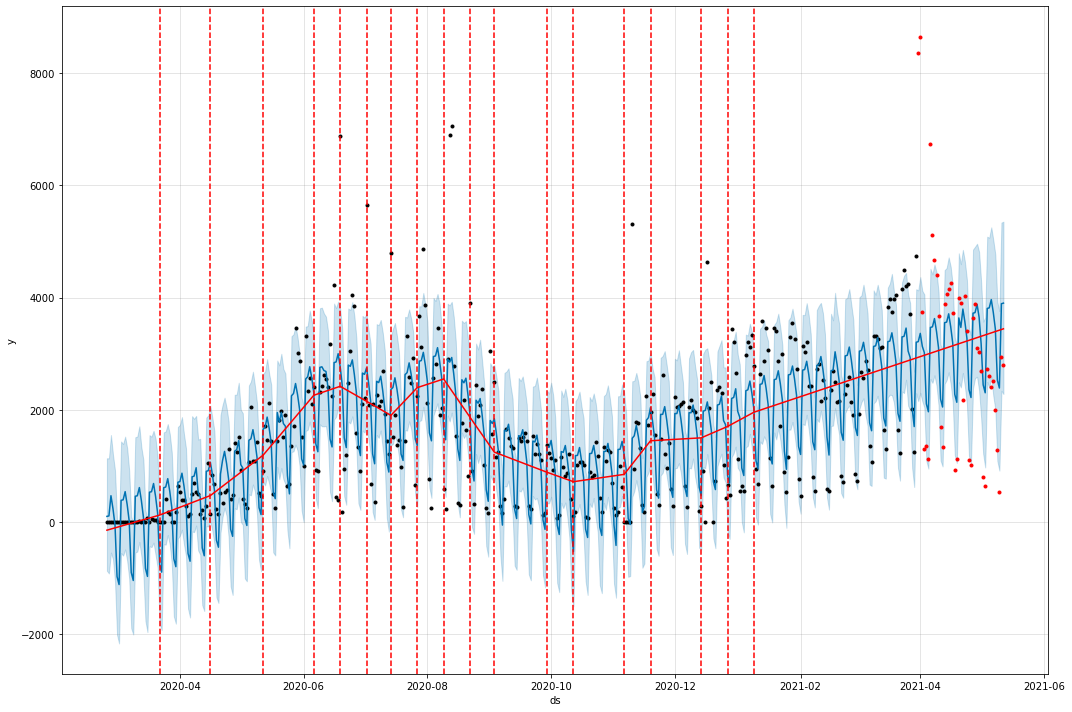

In [47]:
# Plot
fig = modelo_feriados.plot(previsao, figsize=(15,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
a = add_changepoints_to_plot(fig.gca(),modelo_feriados, previsao)

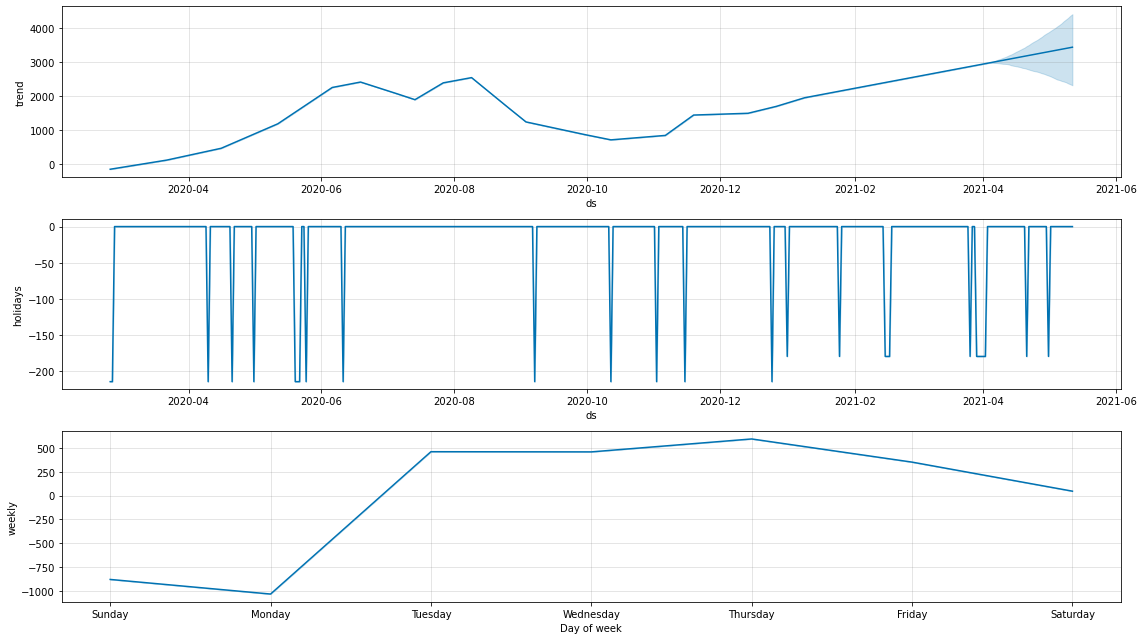

In [48]:
modelo_feriados.plot_components(previsao, figsize=(16,9));

# Medindo a performace do modelo

In [49]:
from sklearn.metrics import mean_absolute_error

In [59]:
# Lembrar que devem ser comparados dois dataframes com tamanhos iguais, logo são os dados do dataframe de treino comparado com o que foi criado no modelo
mean_absolute_error(profeta['y'], previsao['yhat'][:400])

536.6518476447159

In [61]:
modelo_feriados = Prophet(changepoint_prior_scale=10, holidays= feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(profeta)

datafuturoferiados = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(datafuturoferiados)

# Testando o desempenho do modelo
mean_absolute_error(profeta['y'], previsao['yhat'][:400])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


452.2316528704275

Aparentemente a sazonalidade multiplicativa trouxe um melhor desempenho para o modelo

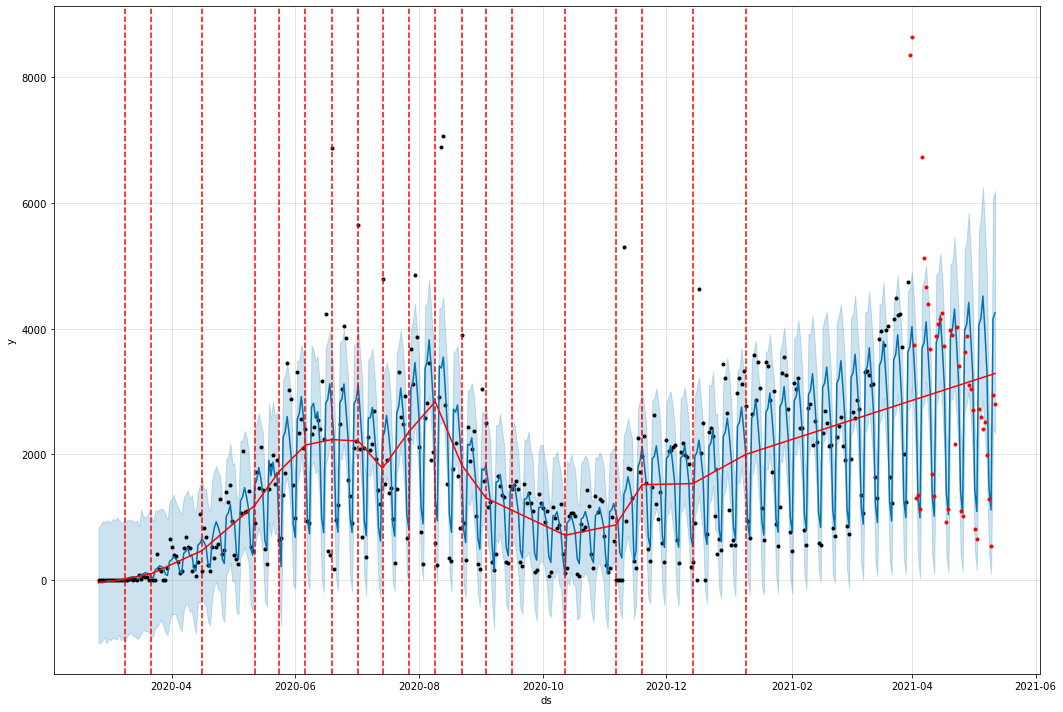

In [62]:
# Plot
fig = modelo_feriados.plot(previsao, figsize=(15,10))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
a = add_changepoints_to_plot(fig.gca(),modelo_feriados, previsao)

# Desafio Extra: Utilizar outras métricas do Scikitlearn e comparar os resultados.

Como o Prophet já possui métricas irei utilizar o próprio medidor de performacer da ferramenta

In [69]:
modelo_feriados = Prophet(changepoint_prior_scale=10, holidays= feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(profeta)

# https://facebook.github.io/prophet/docs/diagnostics.html
from prophet.diagnostics import cross_validation
df_cv = cross_validation(modelo_feriados, initial='300 days', period='180 days', horizon = '30 days')

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(15)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2021-02-28 00:00:00 and 2021-02-28 00:00:00
100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,277834.787176,527.100358,367.270713,0.186717,0.072079,0.156581,1.0
1,4 days,413599.254405,643.116828,574.349847,0.261683,0.248222,0.222501,1.0
2,5 days,154463.112897,393.017955,322.638078,0.122744,0.072079,0.113166,1.0
3,6 days,238089.570681,487.944229,437.378068,0.164566,0.197543,0.163039,1.0
4,7 days,157092.243787,396.348639,359.804253,0.181999,0.197543,0.207322,1.0
5,8 days,181298.403915,425.791503,414.872645,0.260488,0.283398,0.301014,1.0
6,9 days,156457.567708,395.547175,389.992336,0.241112,0.283398,0.277904,1.0
7,10 days,160759.303996,400.948007,395.193855,0.183225,0.139416,0.205167,1.0
8,11 days,130359.983225,361.053989,299.550902,0.090335,0.126862,0.096685,1.0
9,12 days,96612.880416,310.826126,257.192089,0.079899,0.108108,0.084826,1.0
